In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Data

In [2]:
# Load the dataset
data = load_wine()
X, y = data.data, data.target

In [3]:
print(data.DESCR)

print(data.feature_names)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

# Standardize Data for zero mean and unit variance

In [4]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split Data into Training and Test Set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

## Project Data to Lower dimensions with PCA

In [6]:
# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

## Project Data to Lower dimensions with LDA

In [7]:
# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)

# Train a LogisticRegression Classifier with the lower dimensional data

In [8]:
# Train logistic regression on PCA-transformed data
lr_pca = LogisticRegression(multi_class='auto')
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(pca.transform(X_test))
acc_pca = accuracy_score(y_test, y_pred_pca)


# Train logistic regression on LDA-transformed data
lr_lda = LogisticRegression(multi_class='auto')
lr_lda.fit(X_train_lda, y_train)
y_pred_lda = lr_lda.predict(lda.transform(X_test))
acc_lda = accuracy_score(y_test, y_pred_lda)

print("Accuracy with PCA:", acc_pca)
print("Accuracy with LDA:", acc_lda)


Accuracy with PCA: 1.0
Accuracy with LDA: 1.0


# Scatter Plot of data in lower dimensions with PCA

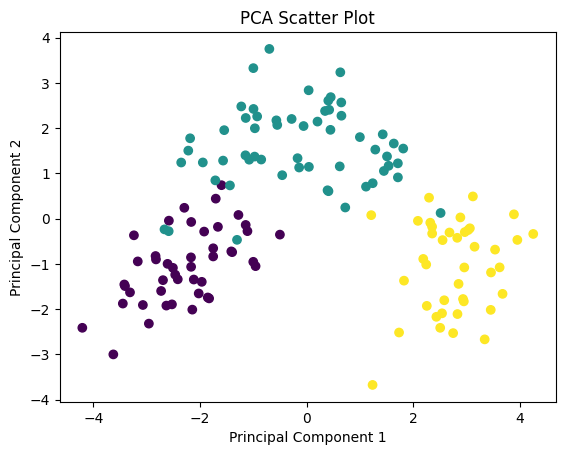

In [9]:
import matplotlib.pyplot as plt

# Plot the PCA-transformed data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()


# Scatter Plot of data in lower dimensions with LDA

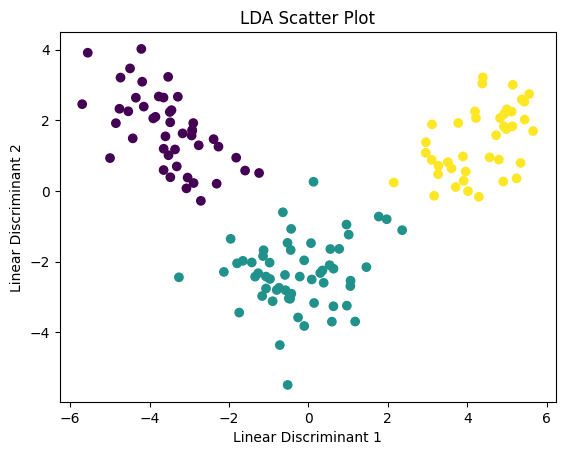

In [10]:
# Plot the LDA-transformed data
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train)
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA Scatter Plot')
plt.show()


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# **Perform LDA manually step-by-step**

In [11]:
from sklearn.datasets import load_wine
import numpy as np

# Load the wine dataset
data = load_wine()
X, y = data.data, data.target

In [12]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X = X_std

In [13]:
y = y + 1

## Compute Mean Vector

In [15]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    #print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1])) 

## Compute the Within-Class Scatter Matrix

In [16]:
# Compute the within-class scatter matrix

#print(S_W.shape)
#print(S_W)

S_W = np.zeros((13,13))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((13,13))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(13,1), mv.reshape(13,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices

#print('within-class Scatter Matrix:\n', S_W)


## Compute the Between-Class Scatter Matrix

In [17]:
# Compute the between-class scatter matrix

overall_mean = np.mean(X, axis=0)

S_B = np.zeros((13,13))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(13,1) # make column vector
    overall_mean = overall_mean.reshape(13,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

#print('between-class Scatter Matrix:\n', S_B)

#print(S_B.shape)
#print(S_B)


# Compute the eigenvalues and eigenvectors

In [18]:
# Compute the eigenvalues and eigenvectors

eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(13,1)   
    #print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    #print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

#print(eig_pairs)

## Validity Check

In [19]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(13,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [20]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

9.081739435042465
4.128469045639487
6.559888238451868e-16
6.444800541133418e-16
6.187145203863281e-16
6.187145203863281e-16
5.218467742805904e-16
5.218467742805904e-16
1.1934835491510317e-16
1.1934835491510317e-16
8.464904934618256e-17
8.464904934618256e-17
0.0


In [21]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 68.75%
eigenvalue 2: 31.25%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%


# Create the transformation matrix W

In [22]:
# Create the transformation matrix W

W = np.hstack((eig_pairs[0][1].reshape(13,1), eig_pairs[1][1].reshape(13,1)))
# W.shape
#print('Matrix W:\n', W.real)

In [23]:
X.shape

(178, 13)

# Project the data onto the new lower-dimensional subspace

In [24]:
# Project the data onto the new subspace
X_lda = X.dot(W)

assert X_lda.shape == (178,2), "The matrix is not 178x2 dimensional."

In [25]:
print(X_lda.shape)

(178, 2)


In [26]:
class_dict =dict(zip([1,2,3], data.target_names))
class_dict

{1: 'class_0', 2: 'class_1', 3: 'class_2'}

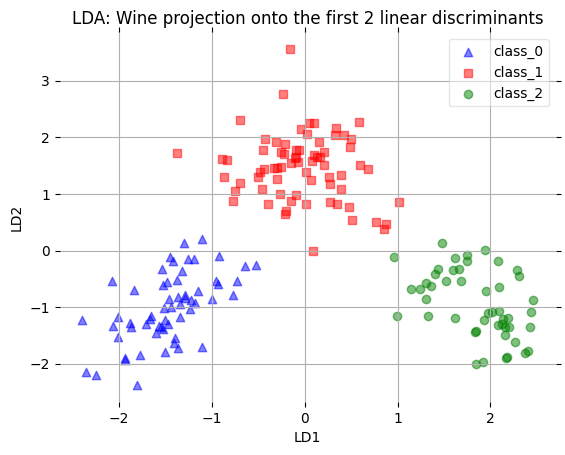

In [27]:
from matplotlib import pyplot as plt

class_dict =dict(zip([1,2,3], data.target_names))


def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(range(1,4), ('^', 's', 'o'), ('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=class_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Wine projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()


/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


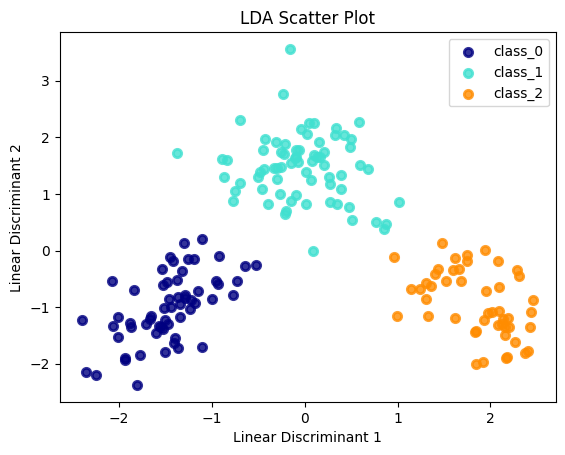

In [28]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], data.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA Scatter Plot')
plt.show()

In the code above, we first compute the within-class and between-class scatter matrices and the eigenvalues and eigenvectors using the same code as in the previous example. 
Then, we sort the eigenvalues and eigenvectors and create a transformation matrix W using the two eigenvectors with the highest eigenvalues. 
Finally, we project the data onto the new subspace by multiplying X with W, and plot the results using matplotlib. 
The resulting plot shows the 3 classes of the Wine dataset projected onto the 2-dimensional LDA space.

# Train a Logistic Regression Classifier on the projected lower-dimensional data by LDA and plot the decision bounday for the classifier

In [29]:
# Load the dataset
data = load_wine()
X, y = data.data, data.target

In [30]:
# Perform LDA for data dimension reduction
lda_sk = LinearDiscriminantAnalysis(n_components=2)
X_lda_sk = lda_sk.fit_transform(X, y)
#X_lda_sk

In [31]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression().fit(X_lda_sk, y)

Text(0.5, 1.0, 'Decision surface for Logistic Regression on LDA projected data')

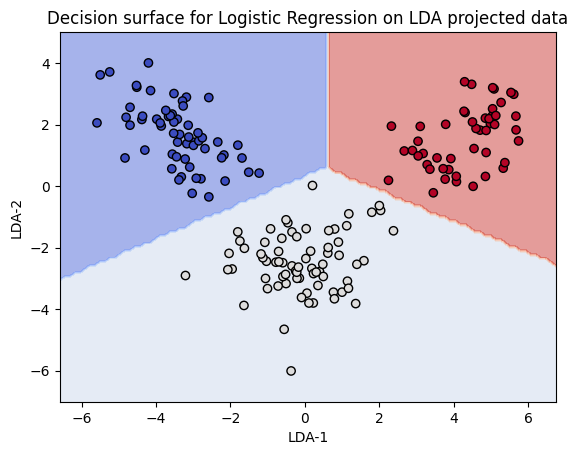

In [32]:
from sklearn.inspection import DecisionBoundaryDisplay

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(lr_classifier , 
                                              X_lda_sk, 
                                              response_method="predict",
                                              xlabel='LDA-1', ylabel='LDA-2',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

# Plotting the data points    
disp.ax_.scatter(X_lda_sk[:, 0], X_lda_sk[:, 1], 
                 c=y, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.title("Decision surface for Logistic Regression on LDA projected data")
